In [2]:
import pandas as pd
import numpy as np
import os

In [43]:
link_nature_2 = '/Users/hdao/Google Drive/My Drive/Oncohistone Database_AP_review/Nature 2019 dataset/Nature 2019_Table 2_histone mutations on a per patient basis_41586_2019_1038_MOESM3_ESM.xlsx'
link_nature_3 = '/Users/hdao/Google Drive/My Drive/Oncohistone Database_AP_review/Nature 2019 dataset/Nature 2019_Table 3_per patient basis where TMB less than 10 mutations Mb_41586_2019_1038_MOESM4_ESM.xlsx'
link_nature_4 = '/Users/hdao/Google Drive/My Drive/Oncohistone Database_AP_review/Nature 2019 dataset/Nature 2019_Table 4_per patient basis where TMB less than 2 mutations per Mb_41586_2019_1038_MOESM5_ESM.xlsx'

In [44]:
nature_2 = pd.read_excel(link_nature_2)
nature_3 = pd.read_excel(link_nature_3)
nature_4 = pd.read_excel(link_nature_4)
nature_2.columns

Index(['Hugo_Symbol', 'Protein_Change_Histone_Convention', 'Cancer_Study',
       'Patient_Barcode', 'Tumor_Sample_Barcode', 'Oncotree_Code',
       'Main_Cancer_Type', 'Curated_Main_Cancer_Type', 'Detailed_Cancer_Type',
       'Mutation_Count_in_Sample', 'Sequencing_Panel', 'Exome_Coverage (Mb)',
       'Tumor_Mutational_Burden (Nonsynonymous mutations per Mb)',
       'Entrez_Gene_Id', 'Transcript_ID', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Variant_Classification',
       'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1',
       'Protein_Change_HGVSp', 'Reference_Amino_Acid', 'Variant_Amino_Acid',
       'Protein_Start_Position_Histone_Convention',
       'Protein_End_Position_Histone_Convention', 'Protein_Start_Position_VEP',
       't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count',
       'Allele_Frequency_Tumor', 'Allele_Frequency_Normal'],
      dtype='object')

In [82]:
pd.set_option('display.max_rows', 10) # change to None or 1000 to display all output
nature_2.Hugo_Symbol.value_counts()

HIST1H3B     273
H3F3C        172
HIST1H3C     150
HIST1H3I     147
HIST1H2BD    145
            ... 
HIST3H2A      28
H2AFJ         28
HIST4H4       24
HIST1H4A      21
H2AFB1        17
Name: Hugo_Symbol, Length: 63, dtype: int64

In [50]:
def detect_4_groups(x):
    if x[:3] == 'H2A' or x[:3] == 'H2B':
        return x[:3]
    if x[:2] == 'H4' or x[:2] == 'H3':
        return x[:2]
    else:
        return 'other group'

In [51]:
nature_2['group'] = nature_2.Hugo_Symbol.apply(detect_4_groups)
nature_3['group'] = nature_3.Hugo_Symbol.apply(detect_4_groups)
nature_4['group'] = nature_4.Hugo_Symbol.apply(detect_4_groups)
nature_2.group.value_counts()

other group    3544
H3              371
H2A             224
Name: group, dtype: int64

In [52]:
nature_2['residue_aa'] = nature_2.Protein_Change_HGVSp.apply(lambda x : x[:2])
nature_3['residue_aa'] = nature_3.Protein_Change_HGVSp.apply(lambda x : x[:2])
nature_4['residue_aa'] = nature_4.Protein_Change_HGVSp.apply(lambda x : x[:2])

### Nature Table 2 

In [83]:
# count distinct Protein_Change_HGVSp
nature_2[nature_2['group']!='other group'].groupby(['group','residue_aa']).Protein_Change_HGVSp.nunique()

group  residue_aa
H2A    A1            13
       A2             4
       A3             2
       A5             6
       A6             3
                     ..
H3     V1             1
       V4             3
       V8             1
       Y4             1
       Y5             1
Name: Protein_Change_HGVSp, Length: 152, dtype: int64

In [74]:
nature_2[nature_2['group']!='other group'].groupby(['group','residue_aa']).Protein_Change_HGVSp.nunique()

group  residue_aa
H2A    A1            13
       A2             4
       A3             2
       A5             6
       A6             3
                     ..
H3     V1             1
       V4             3
       V8             1
       Y4             1
       Y5             1
Name: Protein_Change_HGVSp, Length: 152, dtype: int64

In [62]:
#count Protein_Change_HGVSp
nature_2[nature_2['group']!='other group'].groupby(['group','residue_aa']).count().Protein_Change_HGVSp

group  residue_aa
H2A    A1            13
       A2             4
       A3             2
       A5            13
       A6             3
                     ..
H3     V1             1
       V4             5
       V8             4
       Y4             1
       Y5             1
Name: Protein_Change_HGVSp, Length: 152, dtype: int64

In [75]:
(nature_2[nature_2['group']!='other group'].groupby(['group','residue_aa']).count().Protein_Change_HGVSp)

group  residue_aa
H2A    A1            13
       A2             4
       A3             2
       A5            13
       A6             3
                     ..
H3     V1             1
       V4             5
       V8             4
       Y4             1
       Y5             1
Name: Protein_Change_HGVSp, Length: 152, dtype: int64

In [76]:
(nature_2[nature_2['group']!='other group'].groupby(['group','residue_aa']).count().Protein_Change_HGVSp)

group  residue_aa
H2A    A1            13
       A2             4
       A3             2
       A5            13
       A6             3
                     ..
H3     V1             1
       V4             5
       V8             4
       Y4             1
       Y5             1
Name: Protein_Change_HGVSp, Length: 152, dtype: int64

<AxesSubplot:xlabel='residue_aa'>

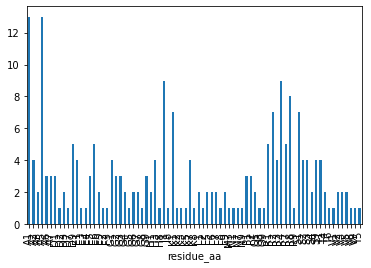

In [81]:
nature_2[nature_2['group']=='H2A'].groupby(['residue_aa']).count().Protein_Change_HGVSp.plot.bar()

### Nature table 3 

In [47]:
nature_3[nature_3['group']!='other group'].groupby(['group','Hugo_Symbol']).Protein_Change_HGVSp.nunique()

group  Hugo_Symbol
H2A    H2AFB1          3
       H2AFJ          11
       H2AFV           9
       H2AFX          13
       H2AFY          21
       H2AFZ          14
H3     H3F3A          30
       H3F3B          31
       H3F3C          41
Name: Protein_Change_HGVSp, dtype: int64

In [48]:
nature_4[nature_4['group']!='other group'].groupby(['group','Hugo_Symbol']).Protein_Change_HGVSp.nunique()

group  Hugo_Symbol
H2A    H2AFJ          5
       H2AFV          3
       H2AFX          4
       H2AFY          1
       H2AFZ          5
H3     H3F3A          9
       H3F3B          6
       H3F3C          5
Name: Protein_Change_HGVSp, dtype: int64